# Compare error using haversine distance and euclidean one

/tmp/ipykernel_1118/628506608.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax0.pcolor(X,Y,Z0)
/tmp/ipykernel_1118/628506608.py:58: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax1.pcolor(X,Y,Z1)


Text(0.5, 1.0, 'Relative error to Haversine distance, radius = 500 km')

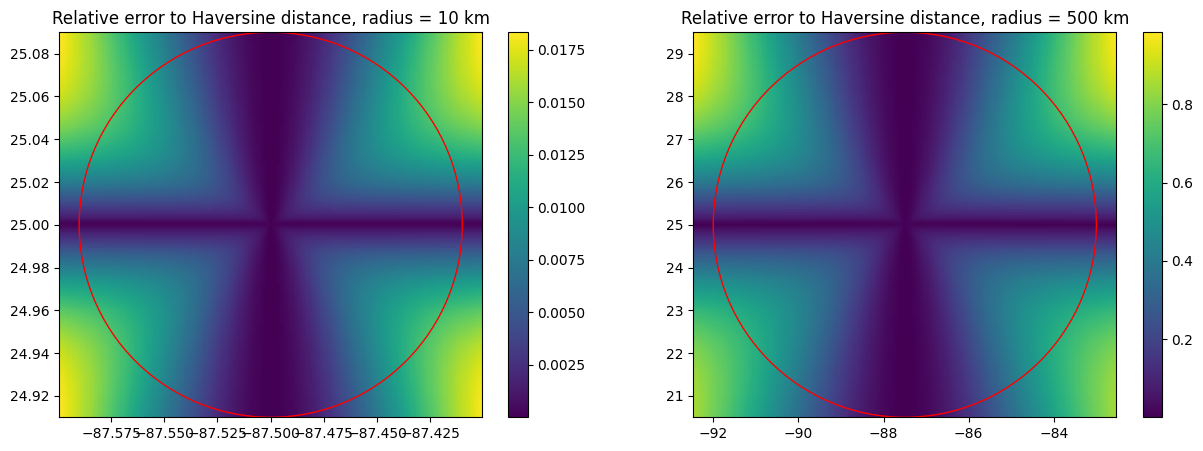

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ocean_navigation_simulator.utils import units

def r(d):
    return d * np.pi / 180

def dist_hav(x, y, x0, y0):
    dlat = r(y - y0)
    dlon = r(x - x0)
    a = np.sin(dlat / 2)**2 + np.cos(r(y0)) * np.cos(r(y)) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return units.Distance(rad=c).km #6371 * c

def dist_eucl(x, y, x0, y0):
    return units.Distance(deg=np.sqrt(((x-x0)*np.cos(r(y0)))**2 + (y-y0)**2)).km

def error(x, y, x0, y0):
    return np.abs(dist_hav(x, y, x0, y0) - dist_eucl(x, y, x0, y0))/ dist_hav(x, y, x0, y0) * 100

# sampling circle radius in KMS
r_km = np.array([10, 500])
r_deg = units.Distance(km=r_km).deg
nb_points = 200
# set up the figure and subplots
fig = plt.figure(figsize=(15, 5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

lon_range_GOM = np.array([-97, -78])
lat_range_GOM = np.array([20, 30])
center_p = [lon_range_GOM.mean(), lat_range_GOM.mean()] # lon lat

# First subplot using radius r_deg[0]
# set the ranges and contour levels
x = np.linspace(center_p[0]-r_deg[0] / np.cos(r(center_p[1])),center_p[0]+ r_deg[0] / np.cos(r(center_p[1])), nb_points)
y = np.linspace(center_p[1] - r_deg[0], center_p[1] + r_deg[0], nb_points)
X, Y = np.meshgrid(x, y)
Z0 = error(X, Y, center_p[0], center_p[1])
# plot the heatmap
c = ax0.pcolor(X,Y,Z0)
fig.colorbar(c, ax=ax0)
circle1 = patches.Circle((center_p[0], center_p[1]), r_deg[0], fill=False, edgecolor='r')
ax0.add_patch(circle1)
ax0.set_title(f"Relative error to Haversine distance, radius = {r_km[0]} km")

# Second subplot using radius r_deg[1]
x = np.linspace(center_p[0]-r_deg[1] / np.cos(r(center_p[1])),center_p[0]+ r_deg[1] / np.cos(r(center_p[1])), nb_points)
y = np.linspace(center_p[1] - r_deg[1], center_p[1] + r_deg[1], nb_points)
X, Y = np.meshgrid(x, y)
Z1 = error(X, Y, center_p[0], center_p[1])
# plot the heatmap
c = ax1.pcolor(X,Y,Z1)
fig.colorbar(c, ax=ax1)
circle1 = patches.Circle((center_p[0], center_p[1]), r_deg[1], fill=False, edgecolor='r')
ax1.add_patch(circle1)
ax1.set_title(f"Relative error to Haversine distance, radius = {r_km[1]} km")